In [1]:
from copy import deepcopy
from tqdm import tqdm # библиотека для создания шкалы прогресса итерационного процесса

import seaborn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
std_error = 30 # коэффициент который нужен для генерации случайных данных в разбросе
sample_size = 10000 # размер выборки
theta0, theta1 = 1, 10 # параметры функции, описанной выше

# X - вектор признаков, y - вектор значений целевой переменной
x = np.random.randn(sample_size) # генерация случайной выборки
func_y = lambda x: theta0 + theta1 * x # лямбда-функция для расчета значений функции

# def func_y(x):
#     return theta0 + theta1 * x

y = func_y(x) + std_error * np.random.randn(sample_size) # расчет значений выборки с учетом случайного разброса

In [3]:
# Визуализация выборки

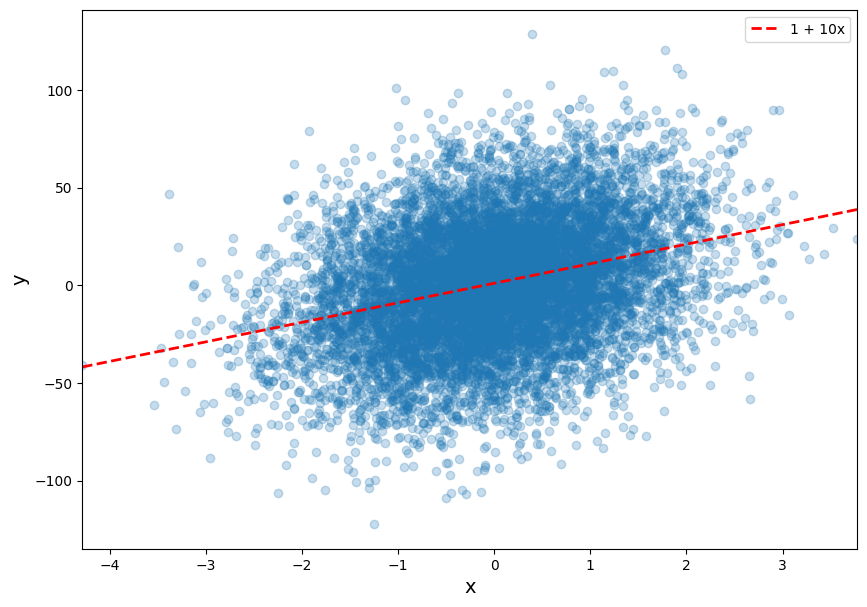

In [4]:
x_plot = np.linspace(x.min(), x.max(), 1000) 
y_plot = func_y(x_plot)

fig = plt.figure(figsize=(10, 7))
plt.scatter(x, y, alpha=0.25)
plt.plot(x_plot, y_plot, "r--", linewidth=2, label=f"{theta0} + {theta1}x")
plt.xlim(x.min(), x.max())
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.legend(loc="best")

plt.show()

Заметим, что точки располагаются облаком вокруг прямой

Напишем функции, который делают «предсказание», т. е. вычисляют значения функции при заданных параметрах для данного облак точек. Если все сделано верно, то итоговая функция совпадет с изначальной красной прямой:

In [5]:
def calculate_predictions(theta0, theta1, X):
    """
    Вычисление значения функции для заданных коэффициентов и значений X.

    Parameters
    ----------
    theta0: float
        Значение параметра theta0.

    theta1: float
        Значение параметра theta1.

    X: array-like, shape = [n_samples, ]
        Вектор признаков.

    Returns
    -------
    y_pred: array-like, shape = [n_samples, ]
        Полученное значение функции.

    """
    return theta0 + theta1*X
   

In [6]:
def calculate_cost(theta0, theta1, X, y):
    """
    Вычисление значения функции потерь.

    Parameters
    ----------
    theta0: float
        Значение параметра theta0.

    theta1: float
        Значение параметра theta1.

    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    Returns
    -------
    cost: float
        Значение функции потерь.

    """
    # перевод значений коэффициентов в удобный для работы программы вид
    theta0 = np.atleast_3d(np.asarray(theta0)) 
    theta1 = np.atleast_3d(np.asarray(theta1))

    y_pred = calculate_predictions(theta0, theta1, X)
    cost = np.average((y - y_pred)**2, axis=2)/2

    return cost

In [7]:
def gradient_descent_step(theta, X, y, learning_rate):
    """
    Один шаг градиентного спуска.

    Parameters
    ----------
    theta: array-like
        Массив значений параметров theta.

    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    learning_rate: float
        Скорость обучения.

    Returns
    -------
    updated_theta: array-like
        Обновленный массив значений параметров theta.

    """
    n = len(y)
    y_pred = calculate_predictions(theta[0], theta[1], X)

    updated_theta = deepcopy(theta)
    updated_theta[0] -= learning_rate / n * np.sum((y_pred - y))
    updated_theta[1] -= learning_rate / n * np.sum((y_pred - y) * X)

    return updated_theta

In [12]:
def plot_gradient_descent(cost_history, theta_history, X, y):
    """
    Parameters
    ----------
    cost_history: list[float]
        Список со значениями функции потерь на каждой
        итерации обучения.

    theta_history: list[np.array]
        Список двумерных массивов со значением параметров theta.

    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    """
    fig = plt.figure(figsize=(15, 15))
    # На первом графике отображена зависимость значения функции потерь на каждой итерации обучения.
    plt.subplot(221)
    plt.scatter(range(len(cost_history)), cost_history)
    plt.xlabel("число итераций", size=14)
    plt.ylabel(r"J($\theta$)", size=14)

    # На втором графике отображена зависимость значений параметров theta от итерации обучения.
    plt.subplot(223)
    plt.scatter(x, y, alpha=0.15)
    x_plot = np.linspace(-3, 3, 500)
    for num, theta in enumerate(theta_history):
        y_plot = calculate_predictions(theta[0], theta[1], x_plot)
        if num == 0:
            plt.plot(x_plot, y_plot, color="green", label="Стартовая линия - baseline", linewidth=5)
        if num == len(theta_history) - 1:
            plt.plot(x_plot, y_plot, color="orange", label="Реузльтат работы", linewidth=5)
        else:
            plt.plot(x_plot, y_plot, "r--", alpha=.5)
    plt.xlim(x_plot.min(), x_plot.max())
    plt.xlabel("x", size=14)
    plt.ylabel("y", size=14)
    plt.plot(x_plot, func_y(x_plot), color = "black", label="Исходная линия", linewidth=3)
    plt.legend(loc="best")

    # На третьем графике отображен процесс изменения результатов расчета параметров полученной прямой.
    plt.subplot(222)
    x_plot = range(len(cost_history)+1)
    plt.scatter(x_plot, [theta[0] for theta in theta_history], label=r'$\theta_0$')
    plt.scatter(x_plot, [theta[1] for theta in theta_history], label=r'$\theta_1$')
    plt.xlabel("число итераций", size=14)
    plt.ylabel(r"$\theta$", size=14)
    plt.legend(loc="best")

    # На четвертом графике отображены линии уровня и процесс градиентного спуска.
    plt.subplot(224)
    plot_cost_function(X, y, theta_history)

# Функция для 4 графика
def plot_cost_function(X, y, theta_history):
    """
    Визуализация процесса градиетного спуска и
    построение линий уровня.

    Parameters
    ----------
    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    theta_history: list[np.array]
        Список двумерных массивов со значением параметров theta.

    """
    theta0 = [theta[0] for theta in theta_history]
    theta1 = [theta[1] for theta in theta_history]

    #theta0_grid = np.linspace(-5*min(theta0), max(theta0), 200)
    #theta1_grid = np.linspace(-5*min(theta1), max(theta1), 200)
    theta0_grid = np.linspace(-25, 25, 200)
    theta1_grid = np.linspace(-25, 25, 200)
    cost_grid = calculate_cost(
        theta0_grid[np.newaxis,:,np.newaxis],
        theta1_grid[:,np.newaxis,np.newaxis],
        X, y
    )
    X, Y = np.meshgrid(theta0_grid, theta1_grid)

    theta0, theta1 = theta_history[-1]
    plt.scatter([theta0]*2, [theta1]*2, s=[50, 0], color=['k','w'])
    contours = plt.contour(X, Y, cost_grid, 30)
    plt.clabel(contours)

    for it in range(1, len(theta_history)):
        plt.annotate(
            '', xy=theta_history[it], xytext=theta_history[it-1],
            arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 2},
            va='center', ha='center'
        )

    plt.scatter(*zip(*theta_history), color="black", s=40, lw=0)
    plt.xlim(theta0_grid.min(), theta0_grid.max())
    plt.ylim(theta1_grid.min(), theta1_grid.max())
    plt.xlabel(r'$\theta_0$', size=15)
    plt.ylabel(r'$\theta_1$', size=15)
    plt.title('Функция потерь', size=15)

Запускаем

In [10]:
n_iterations, learning_rate = 100, 0.5
theta_history, cost_history = [100*np.random.rand(2)], []

for it in tqdm(range(n_iterations)):
    last_theta = theta_history[-1]
    current_theta = gradient_descent_step(
        theta=last_theta, X=x, y=y, learning_rate=learning_rate
    )
    theta_history.append(current_theta)
    cost_history.append(calculate_cost(current_theta[0], current_theta[1], X=x, y=y))

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 8266.76it/s]


Визуализируем

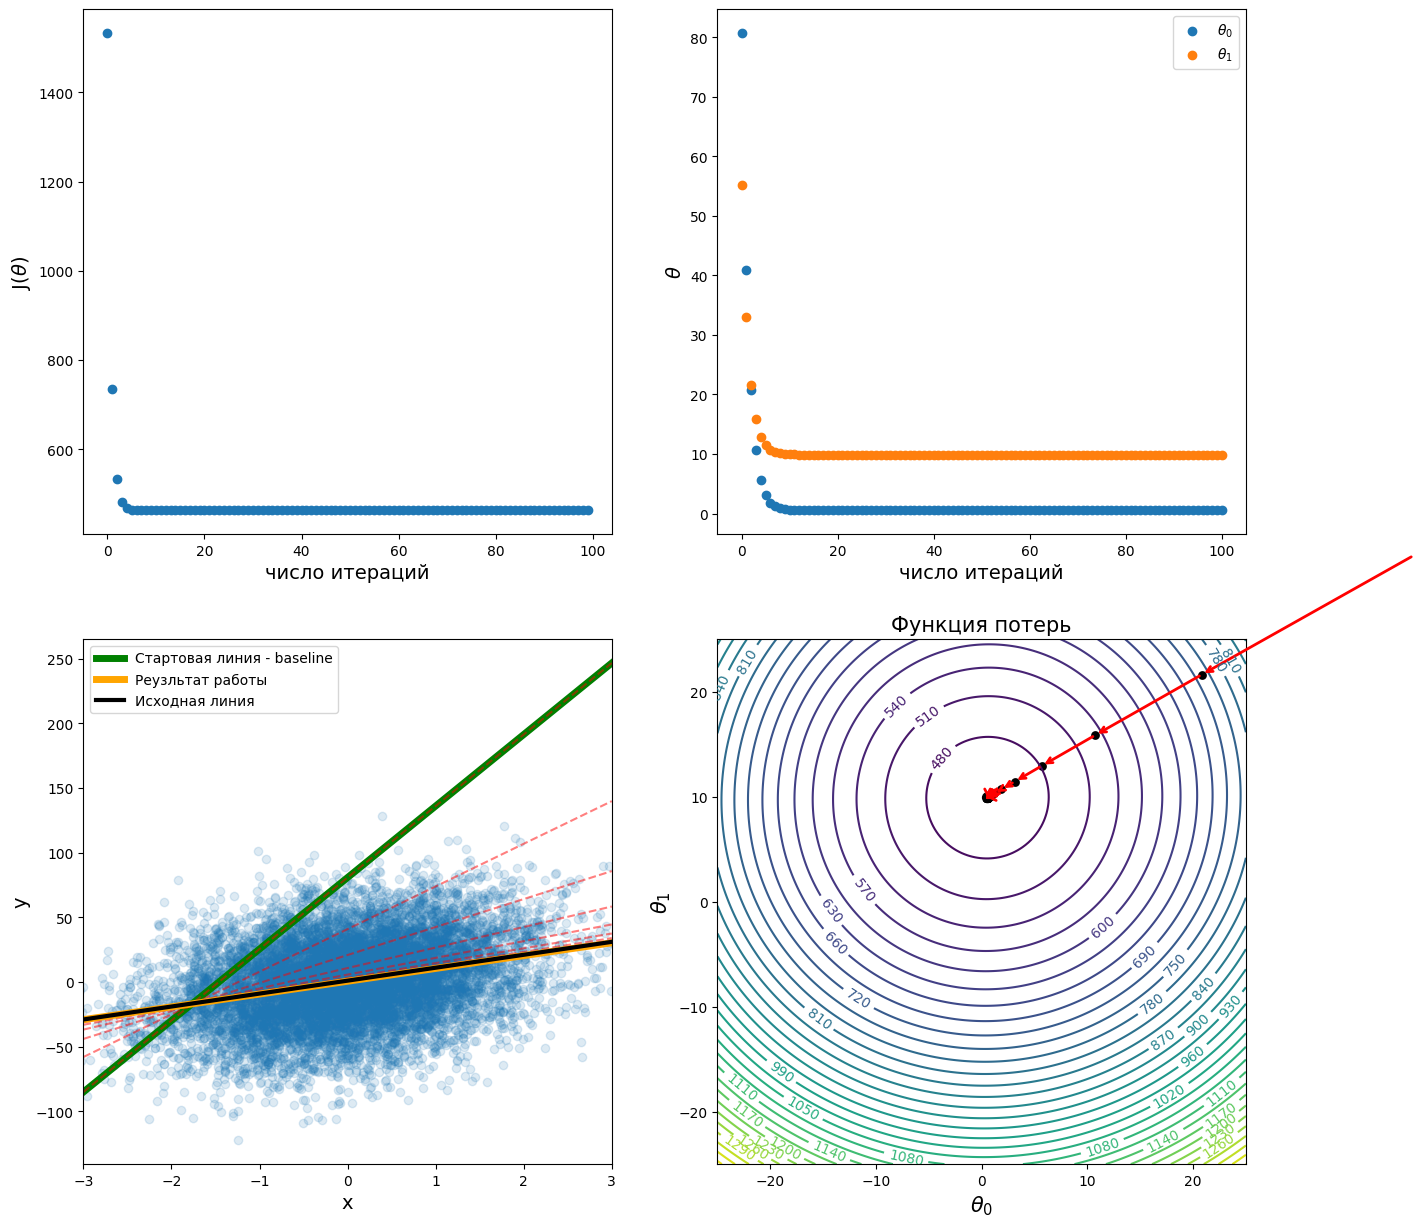

In [11]:
plot_gradient_descent(
    cost_history=cost_history,
    theta_history=theta_history,
    X=x, y=y
)